In [11]:
import numpy as np
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

In [2]:

reviews = []
with open('reviewSelected100.json') as fl:
    for i, line in enumerate(fl):
        reviews.append(json.loads(line))

df = pd.DataFrame(reviews)
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,8aoJJdKEO3ypoZNszpPu7Q,bGgAL09pxLnV_FFgR4ZADg,ZBE-H_aUlicix_9vUGQPIQ,5.0,0,0,0,We had my Mother's Birthday Party here on 10/2...,2016-11-09 20:07:25
1,J5NOCLdhuhor7USRhtYZ8w,pFCb-1j6oI3TDjr26h2cJQ,e-YnECeZNt8ngm0tu4X9mQ,4.0,0,0,0,Good Korean grill near Eaton Centre. The marin...,2015-12-05 05:06:43
2,PXiLWAYRt3xnHaJ8MB4rzw,mEzc6LeTNiQgIVsq3poMbg,j7HO1YeMQGYo3KibMXZ5vg,5.0,2,1,3,Was recommended to try this place by few peopl...,2014-10-11 05:16:15
3,VrLarvxZYJm74yAqtpe9PQ,o-zUN2WEZgjQS7jnNsec0g,7e3PZzUpG5FYOTGt3O3ePA,3.0,0,0,0,Ambience: Would not expect something this nice...,2016-07-25 03:45:26
4,C1CUpidlVFprUCkApqzCmA,Wlx0iBXJvk4x0EeOt2Bz1Q,vuHzLZ7nAeT-EiecOkS5Og,1.0,11,0,3,Absolutely the WORST pool company that I have ...,2016-04-11 18:49:11


In [23]:
df.to_csv('reviewSelected100.csv',index=False)

In [3]:
from nltk.corpus import stopwords
import string

In [4]:
reviews_df=df[['text']]
labels_df=df[['stars']]
print('Total Reviews: %d'%len(reviews_df))
print('Total Labels: %d'%len(labels_df))

Total Reviews: 15300
Total Labels: 15300


In [5]:
data_df=df[['text','stars']]


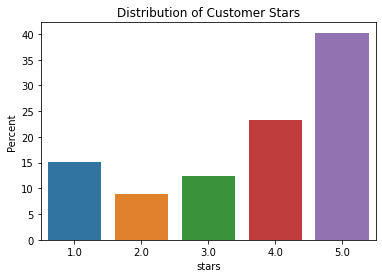

In [6]:
ax = sns.barplot(data=data_df, x='stars', y='stars', estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")
plt.title('Distribution of Customer Stars')
plt.show()

In [7]:
data_df.loc[data_df['stars'] == 3, 'sentiment'] = 'neutral' 
data_df.loc[data_df['stars'] < 3, 'sentiment'] = 'negative' 
data_df.loc[data_df['stars'] > 3, 'sentiment'] = 'positive'

C:\Users\wongy\Anaconda3\envs\py39\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\wongy\Anaconda3\envs\py39\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       15300 non-null  object 
 1   stars      15300 non-null  float64
 2   sentiment  15300 non-null  object 
dtypes: float64(1), object(2)
memory usage: 358.7+ KB


## Data Cleaning

In [9]:
from langdetect import detect

In [21]:
textdf = data_df['text']
langdet = []                                                    

for i in range(len(data_df)):                                         
    try:                                                          
        lang=detect(textdf[i])                                      
    except:                                                       
        lang='no'    
        print(i)                                              
        print("This row throws error:", textdf[i])     
        data_df=data_df.drop(i, axis=0)            
    langdet.append(lang)   

309
This row throws error: ...
13339
This row throws error: ??????????????????????????????????????????????????????????????????10??????????????????????????????????????????????????????????????????????????????????????
13760
This row throws error: ???????????????????????????????????????????????????????????????????????????


In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15297 entries, 0 to 15299
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   text       15297 non-null  object 
 1   stars      15297 non-null  float64
 2   sentiment  15297 non-null  object 
dtypes: float64(1), object(2)
memory usage: 478.0+ KB


In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wongy\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [10]:
nonen=data_df[data_df['text'].apply(detect)!='en']
nonen

LangDetectException: No features in text.

In [8]:
from nltk.corpus import stopwords



In [11]:
full_text = ' '.join(reviews_df['text'])
len(full_text)

9172849